<a href="https://colab.research.google.com/github/Yug-Oswal/YAAS/blob/master/MovieReviewClassif(Error).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

# Loading the IMDB Reviews dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX9YCST/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX9YCST/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX9YCST/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [2]:
# printing dataset info
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path=PosixGPath('/tmp/tmpd31dev52tfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInf

In [3]:
# Printing contents of dataset
print(imdb)

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [4]:
import numpy as np

# Splitting the dataset
train_data, test_data = imdb['train'], imdb['test']

In [5]:
# Checking out train data
for example in imdb['train'].take(3):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [6]:
# All texts and labels are in tensors, Converting them to numpy arrays and loading them
sentences = []
labels = []
testing_sentences = []
testing_labels = []

for s, l in train_data:
  sentences.append(s.numpy().decode('utf8'))
  labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

print(type(sentences))
print(type(labels))
sentences = np.array(sentences)
labels = np.array(labels)
testing_sentences = np.array(testing_sentences)
testing_labels = np.array(testing_labels)

<class 'list'>
<class 'list'>


In [7]:
# Checking out the sentences array
print(sentences[:3])

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [15]:
# Defining params

vocab_size = 10000
oov_tok = "<OOV>"
max_length = 120
trunc_type = 'post'
embedding_dim = 16

In [16]:
# Importing text and sequence preprocessor classes
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Instantiating tokenizer object
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
# Generating word-token dictionary
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
# Converting sentences to sequences
sequences = tokenizer.texts_to_sequences(sentences)
# Padding sequences
padded =  pad_sequences(sequences, truncating = trunc_type, maxlen = max_length)

# Converting test to padded sequences too
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, truncating = trunc_type, maxlen = max_length)

In [17]:
# Define a neural network for classification

# Importing libs
import tensorflow as tf

# Defining the neural net
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(6, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [18]:
# Defining training params
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
# Displaying model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 11526     
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Defining number of epochs
num_epochs = 10

In [21]:
# Training the model
history = model.fit(padded,
                    labels,
                    epochs = num_epochs,
                    validation_data = (testing_padded, testing_labels))

Epoch 1/10
782/782 [==============================] - 45s 56ms/step - loss: 0.4827 - accuracy: 0.7506 - val_loss: 0.3812 - val_accuracy: 0.8282
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2320 - accuracy: 0.9124 - val_loss: 0.4231 - val_accuracy: 0.8140
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0831 - accuracy: 0.9798 - val_loss: 0.5152 - val_accuracy: 0.8078
Epoch 4/10
782/782 [==============================] - 7s 10ms/step - loss: 0.0205 - accuracy: 0.9976 - val_loss: 0.5991 - val_accuracy: 0.8102
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0057 - accuracy: 0.9995 - val_loss: 0.6687 - val_accuracy: 0.8104
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7281 - val_accuracy: 0.8105
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 9.3269e-04 - accuracy: 1.0000 - val_loss: 0.7768 - val_accuracy: 0.8

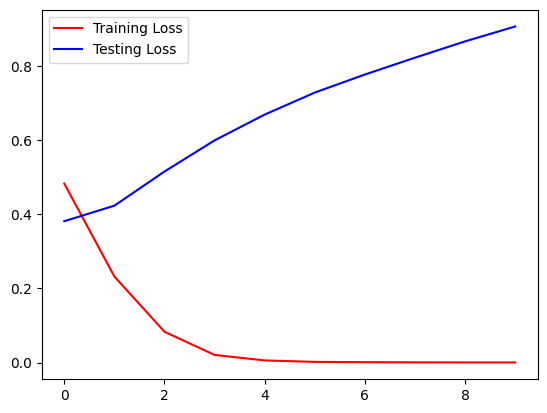

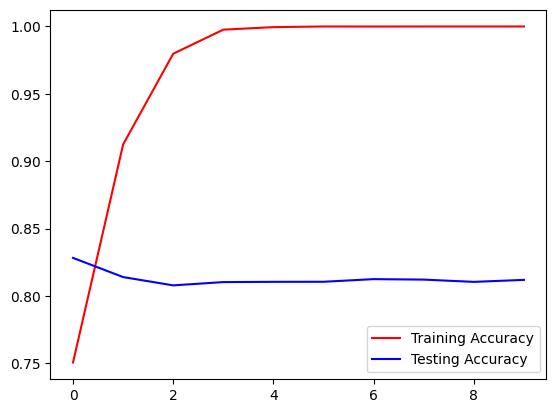

In [22]:
# Checking training history; Check for overfitting
# Importing libs
import matplotlib.pyplot as plt

hist = history.history
loss = hist['loss']
test_loss = hist['val_loss']
acc = hist['accuracy']
test_acc = hist['val_accuracy']
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, test_loss, 'b', label = "Testing Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, test_acc, 'b', label = "Testing Accuracy")
plt.legend()
plt.show()

In [24]:
# Getting the embeddings layer
embedding_layer = model.layers[0]

# Getting the embedding weights
weights = embedding_layer.get_weights()[0]

# Printing the shape of the embeddings list for all the words
weights.shape

(10000, 16)

In [25]:
# Generating the index-word dictionary
index_word = tokenizer.index_word

In [26]:
# Now, setting up the meta.tsv (words) and vecs.tsv (corresponding vectors) files
import io

out_v = io.open('vecs.tsv', 'w', encoding = 'utf8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf8')

for index in range(1, vocab_size):
  word = index_word[index]
  vec = weights[index]

  # Writing to the files
  out_v.write('\t'.join([str(x) for x in vec]) + '\n')
  out_m.write(word + '\n')

# Closing the file pointers
out_v.close()
out_m.close()

In [27]:
# Downloading the generated files
from google.colab import files

files.download('vecs.tsv')
files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Generated Embeddings and their Embedding Projection

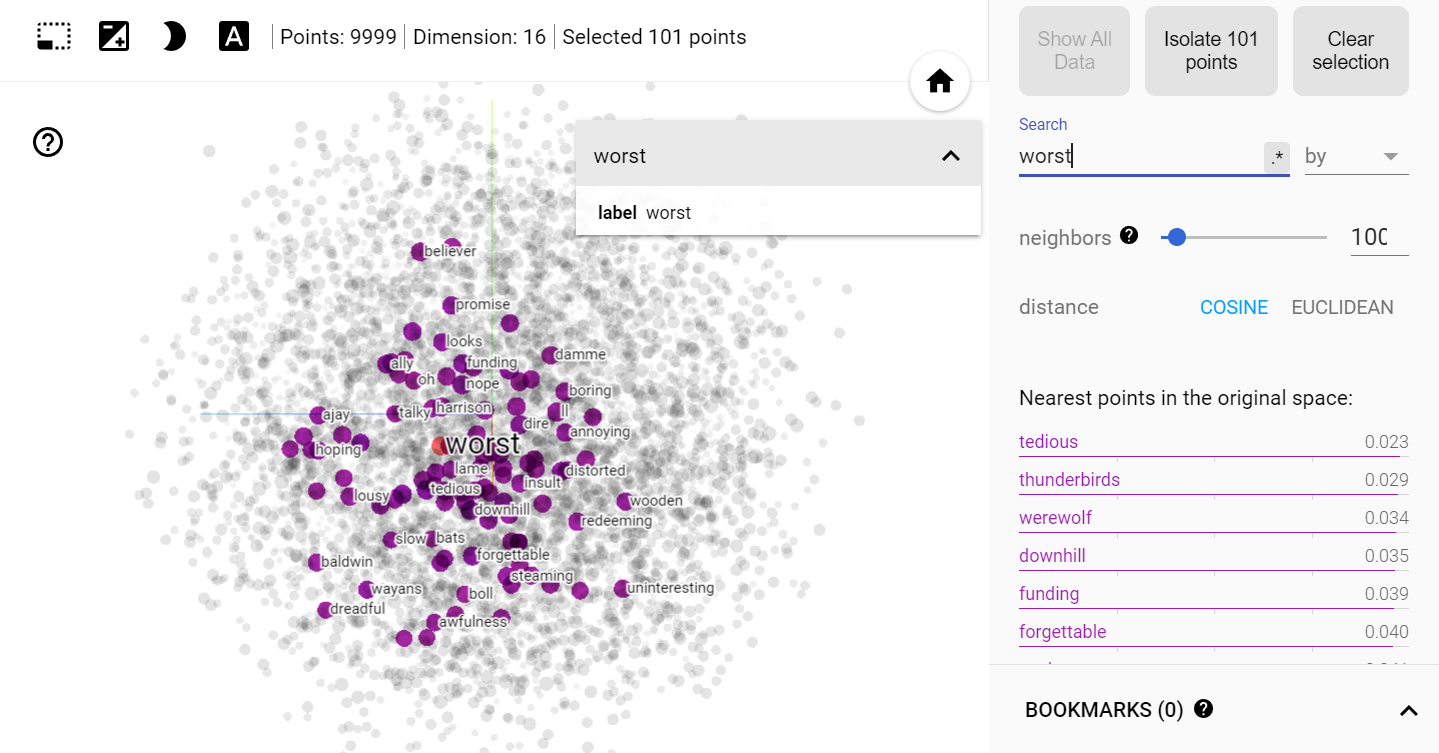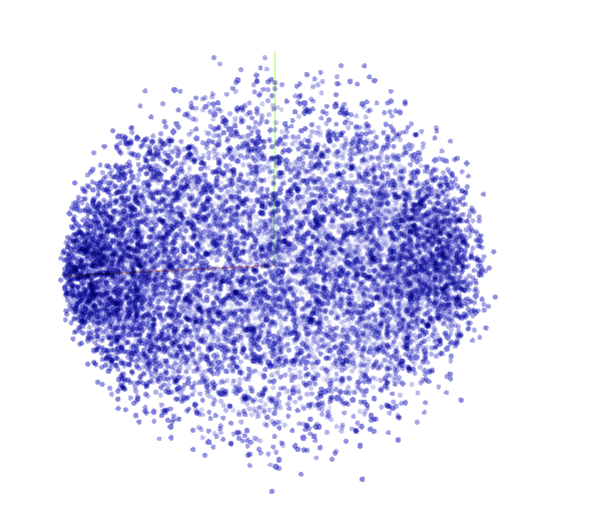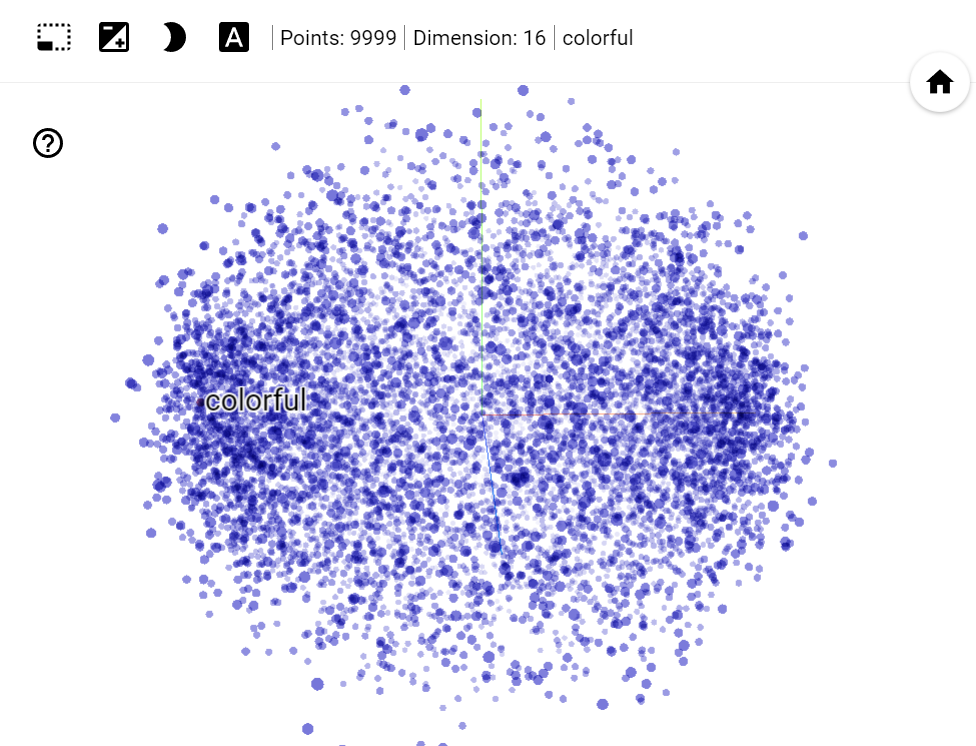